1. Считать цветное изображение в numpy массив.

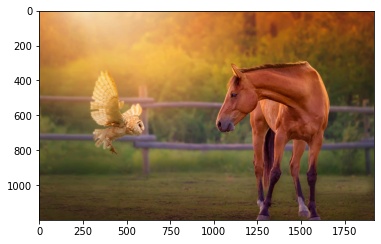

In [256]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('horse1.jpg')
numpyimg = np.array(img)
plt.imshow(numpyimg)
plt.show()


2. Провести инвертирование изображения.

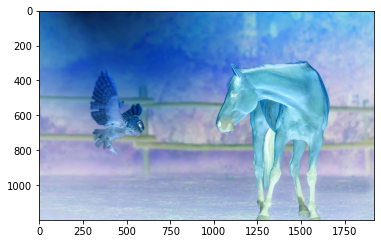

In [257]:
data1 = numpyimg.copy()

for i in range(numpyimg.shape[0]):
    for j in range(numpyimg.shape[1]):
        for k in range(3):
            data1[i,j,k] = 255 - numpyimg[i,j,k]

plt.imshow(data1)
plt.show()

3. Перевести изображение в полутоновое, используя усреднение по каналам.

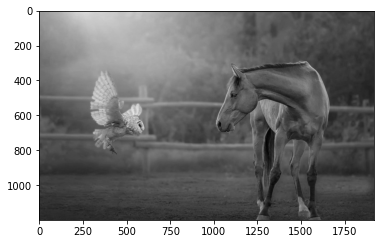

In [258]:
data2 = numpyimg.copy()
temp = np.random.randn(data2.shape[0], data2.shape[1])
for i in range(numpyimg.shape[0]):
    for j in range(numpyimg.shape[1]):
        #sum = numpyimg[i,j,0] * 0.299 + numpyimg[i,j,1] * 0.587 + numpyimg[i,j,2] * 0.114
        #temp[i][j] = sum
        
        #sum = numpyimg[i,j,0] + numpyimg[i,j,1] + numpyimg[i,j,2]
        #sum/=3
        #data2[i,j] = [sum, sum, sum]

        sum = (int(numpyimg[i, j, 0]) + int(numpyimg[i, j, 1]) + int(numpyimg[i, j, 2]))/3
        data2[i, j] = [sum, sum, sum]

plt.imshow(data2)
plt.show()

4. Добавить случайный шум (нормальное распределение).

In [259]:
data3 = data2.copy()
result = data3.copy()
noise = np.random.normal(0,50,(data3.shape))
for i in range(result.shape[0]):
  for j in range(result.shape[1]):
    for k in range(result.shape[2]):
      result[i,j,k] = noise[i,j,k] + int(data3[i,j,k])
      if result[i,j,k] > 255:
        result[i,j,k] = 255
      if result[i,j,k] < 0:
        result[i,j,k] = 0

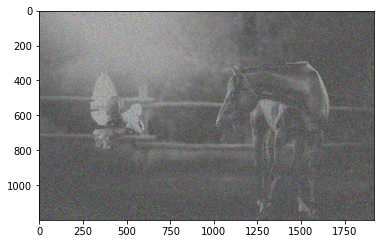

In [260]:
plt.imshow(result)

In [ ]:
5. Построить гистограмму полученного изображения, визуализацию которой осуществить с помощью plt.bar().

In [261]:
t = []
for e in result:
  for e2 in e:
    for e3 in e2:
      t.append(int(e3))

In [262]:
d = {}
for e in t:
  if e not in d.keys():
    d[e] = 1
  else:
    d[e] += 1

<BarContainer object of 256 artists>

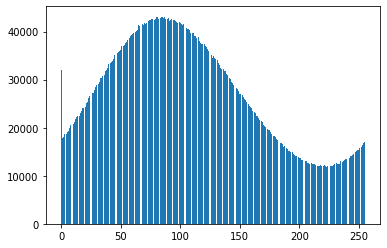

In [263]:
plt.bar(d.keys(), d.values())

# Новый раздел

6. Произвести размытие изображения с помощью ядра Гаусса

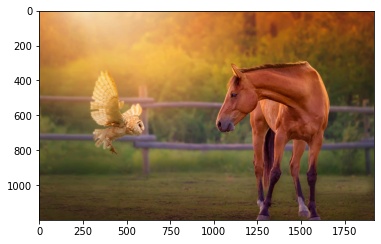

In [273]:
data4 = numpyimg.copy()
plt.imshow(data4)

In [274]:
data4.shape

(1200, 1920, 3)

In [275]:
sigma = 1.3
filter = np.zeros((3,3), dtype=np.float)
p=1 #кол-во нулей
for i in range(-1,2):
  for j in range(-1,2):
    filter[i+p,j+p]=np.exp(-(i**2+j**2)/(2*(sigma**2)))
filter/=(np.sqrt(np.pi*2)*(sigma**2))
filter/=filter.sum()
filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([[0.08941182, 0.12019445, 0.08941182],
       [0.12019445, 0.16157491, 0.12019445],
       [0.08941182, 0.12019445, 0.08941182]])

In [276]:
data5 = np.zeros((data4.shape[0] + 2*p, data4.shape[1] + 2*p, 3))
data5[1:(data5.shape[0]-1),1:(data5.shape[1]-1)] = data4
print(data5[0,0])
print(data5[1,1])

[0. 0. 0.]
[238. 163.  82.]


In [277]:
result2 = data5.copy()
print(result2[2,2,2])
for i in range(result2.shape[0]-2):
  for j in range(result2.shape[1]-2):
    for k in range(3):
      result2[1+i,1+j,k]=np.sum(filter * data5[i:i+3, j:j+3, k])
print(result2[1,1])
result2 = result2.astype(np.uint8)

83.0
[116.73779468  79.67501584  40.50240828]


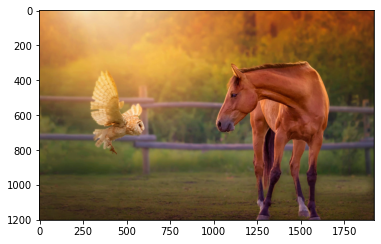

In [286]:
plt.imshow(result2)

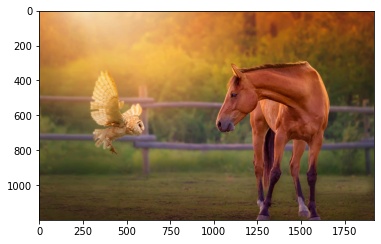

In [279]:
plt.imshow(data4)

7. Реализуйте операцию нерезкого маскирования, для чего сначала требуется размыть изображение, а затем вычесть размытое изображение из исходного. Поэкспериментируйте и попробуйте объяснить результат

In [284]:
result2-data5


array([[[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [-122.,  -84.,  -42.],
        [ -72.,  -50.,  -25.],
        ...,
        [ -41.,  -18.,   -7.],
        [ -69.,  -29.,  -11.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [ -72.,  -49.,  -26.],
        [  -1.,   -1.,   -1.],
        ...,
        [   0.,    0.,    0.],
        [ -41.,  -18.,   -7.],
        [   0.,    0.,    0.]],

       ...,

       [[   0.,    0.,    0.],
        [ -19.,  -15.,   -7.],
        [  -1.,   -1.,    0.],
        ...,
        [   1.,    1.,    1.],
        [ -14.,  -10.,   -3.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [ -34.,  -26.,  -15.],
        [ -20.,  -15.,   -8.],
        ...,
        [ -17.,  -13.,   -5.],
        [ -25.,  -21.,   -8.],
        [   0.,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


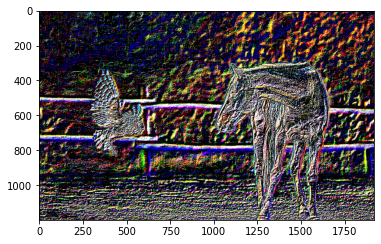

In [281]:
a = result2.copy()
b = data4.copy()
c = data4.copy()
for i in range(result2.shape[0]-2):
  for j in range(result2.shape[1]-2):
    for k in range(3):
      c[i,j,k] = b[i,j,k] - a[i,j,k]
      if c[i,j,k] < 0:
        c[i,j,k] = 0
plt.imshow(c)

8. Проведите выравнивание гистограммы – нормировку яркости так, чтобы результирующая гистограмма содержала все возможные значения яркости примерно в одинаковом количестве.

<BarContainer object of 256 artists>

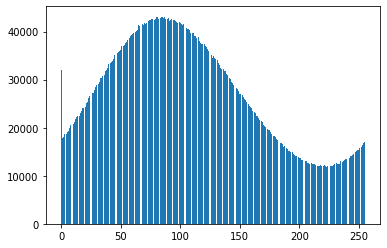

In [283]:
plt.bar(d.keys(), d.values())

2304000.0
[0.000000e+00 8.000000e+00 4.600000e+01 1.650000e+02 3.370000e+02
 5.390000e+02 7.600000e+02 1.036000e+03 1.380000e+03 1.661000e+03
 1.914000e+03 2.230000e+03 2.600000e+03 2.988000e+03 3.362000e+03
 3.850000e+03 4.369000e+03 4.843000e+03 5.374000e+03 5.959000e+03
 6.630000e+03 7.387000e+03 8.322000e+03 9.409000e+03 1.069500e+04
 1.207100e+04 1.347100e+04 1.505800e+04 1.673800e+04 1.864700e+04
 2.068200e+04 2.289100e+04 2.533600e+04 2.826900e+04 3.237000e+04
 3.639800e+04 4.100000e+04 4.654900e+04 5.343100e+04 6.138200e+04
 7.043200e+04 8.118600e+04 9.344900e+04 1.080630e+05 1.239760e+05
 1.407140e+05 1.588530e+05 1.773330e+05 1.956730e+05 2.145260e+05
 2.337350e+05 2.536010e+05 2.742330e+05 2.947470e+05 3.154180e+05
 3.371720e+05 3.601450e+05 3.836990e+05 4.066790e+05 4.294510e+05
 4.534560e+05 4.775010e+05 5.028590e+05 5.299860e+05 5.579030e+05
 5.850290e+05 6.115480e+05 6.387920e+05 6.667150e+05 6.949170e+05
 7.242680e+05 7.535570e+05 7.834140e+05 8.148880e+05 8.469910e+05


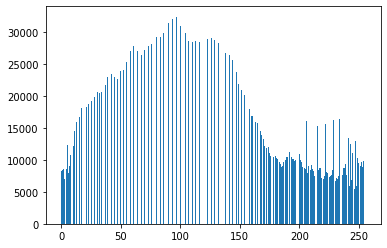

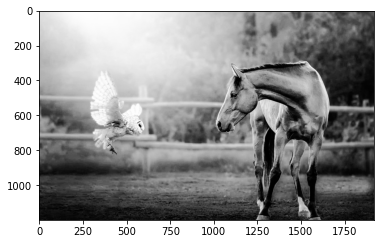

In [295]:
def Hist(img):
  arr=np.zeros((256))
  for j in range(img.shape[0]):
    for i in range(img.shape[1]):
      arr[img[j,i,0]]+=1
  return arr

def Prob(arr):
  res=arr.copy()
  #print(arr)
  sum=0
  for i in range(len(arr)):
    sum+=arr[i]
    res[i]=sum
  print(res)
  return res

def Norm(img,arr):
  w,h=img.shape[0],img.shape[1]
  d=arr[len(arr)-1]
  res=img.copy()
  for x in range(w):
    for y in range(h):
      for c in range(3):
        color=int(arr[img[x,y,0]]/d*255)
        res[x,y,c]=color
  return res

def HalfTone(img):
  res=img.copy()
  for j in range(img.shape[0]):
    for i in range(img.shape[1]):
      color=0
      for k in range(3):
        color+=img[j,i,k]
      color/=3
      res[j,i]=[color,color,color]
  return res

data6 = data2.copy()
arr=Hist(data6)
print(np.sum(arr))
flat_hist=Norm(data6,Prob(arr))
arr=Hist(HalfTone(flat_hist))
x=range(len(arr))
plt.bar(x,arr)
plt.show()
plt.imshow(flat_hist)
